In [1]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

In [2]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """ the error from predicting beta * x_i + alpha when the actual value is y_i """
    return predict(alpha, beta, x_i) - y_i

In [3]:
from scratch.linear_algebra import Vector

def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

In [4]:
from typing import Tuple
from scratch.linear_algebra import Vector
from scratch.statistic import correlation, standard_deviation, mean

def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    """
    Given two vectors x and y,
    find the least-squares values of alpha and beta
    """
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [5]:
x = list(range(-100, 110, 10))
y = [3 * i - 5 for i in x]

# Should find that y = 3x - 5
assert least_squares_fit(x, y) == (-5, 3)

In [6]:
from scratch.statistic import de_mean

def total_sum_of_squares(y: Vector) -> float:
    """ the total squared variation of y_i from their mean """
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    """
    the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

In [7]:
from pathlib import Path

iris_dataset_file = Path() / 'datasets' / 'iris.dat'
assert iris_dataset_file.is_file(), f'{iris_dataset_file} not found'

In [ ]:
import csv
from scratch.linear_algebra import magnitude

X, y = [], []
with iris_dataset_file.open('r') as f:
    reader = csv.reader(f)
    for row in reader:
        if row:
            # because we are working with simple linear regression
            # we need transform the data to a single feature
            # so we gonna take the magnitude of the entire row
            X.append(magnitude([float(cell) for cell in row[:-1]]))
            y.append(row[-1].replace('Iris-', ''))

# remap y to integers
y_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y = [y_map[y_i] for y_i in y]

In [14]:
from scratch.machine_learning import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_pct=0.25)

In [15]:
import random
import tqdm
from scratch.gradient_descent import gradient_step


num_epochs = 10000
random.seed(0)  

guess = [random.random(), random.random()]

leaning_rate = 0.00001

with tqdm.trange(num_epochs) as t:
    for _ in t:
        alpha, beta = guess

        # Partial derivative of loss with respect to alpha
        grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                     for x_i, y_i in zip(X_train, y_train))

        # Partial derivative of loss with respect to beta
        grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                     for x_i, y_i in zip(X_train, y_train))

        # Compute loss to stick in the tqdm description
        loss = sum_of_sqerrors(alpha, beta, X_train, y_train)
        t.set_description(f"loss: {loss}")

        # Finally, update the guess
        guess = gradient_step(guess, [grad_a, grad_b], -leaning_rate)

guess

loss: 30.111354754801475: 100%|██████████| 10000/10000 [00:04<00:00, 2125.24it/s]


[-1.1161529318347219, 0.2774509024592706]

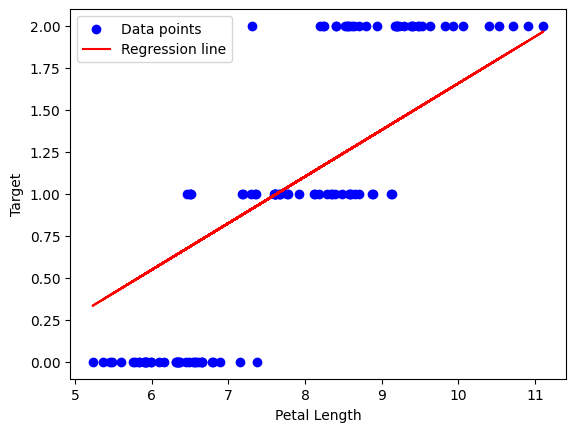

In [16]:
import matplotlib.pyplot as plt

# Plotting the scatter plot and the linear regression line
plt.scatter(X_train, y_train, color='blue', label='Data points')
plt.plot(X_train, [predict(alpha, beta, x_i) for x_i in X_train], color='red', label='Regression line')
plt.xlabel('Petal Length')
plt.ylabel('Target')
plt.legend()
plt.show()